# Working with U.S. Census Data in Python Using `censusdis`

## Background, History, and Upcoming Events

<table>
    <tr>
        <td rowspan="3" width="240">
            <a href="https://www.communitycoalitiononrace.org/" target="_blank">
              <img src="./images/communitycoalitiononrace_logo.png" alt="Community Coalition on Race Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2020</td>
        <td style="font-size:16pt">
            CCR migrated from CD-ROM and spreadsheet census data to the US. Census API using 
            the <a href="https://github.com/jtleider/censusdata">censusdata</a> Python package
            and some internal interface code.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2021</td>
        <td style="font-size:16pt">
            Developed <a href="https://github.com/vengroff/divintseg">divintseg</a>, Python
            package for computing diversity, integration, and segregation metrics.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2022</td>
        <td style="font-size:16pt">
            Censusdata support ended. We rewrote CCR's internal interface as the open source <a href="https://github.com/vengroff/censusdis">censusdis</a> package to load data and compute dis metrics. We added mapping and other utilities to make it a one stop shop.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.twosigma.com/" target="_blank">
                <img src="./images/ts-logo.svg" alt="Two Sigma Logo" width="200"/>
            </a>
            <br/>
            <a href="https://www.twosigma.com/data-clinic/" target="_blank">
                <img src="./images/logo-ts-data-clinic.png" alt="TS Data Clinic Logo" width="200"/>
            </a>
            <br/>
            <a href="https://housingnavigatorma.org/" target="_blank">
                <img src="./images/housing-nav-logo.svg" alt="mybinder.org" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            Used censusdis along with proprietary data to analyze affordable
            housing availability and need in Massachusetts.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://datapinions.com/" target="_blank">
                <img src="https://datapinions.com/wp-content/uploads/2023/02/cropped-favicon512.png" alt="Datapinions" width="100"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            <a href="http://di-map.datapinions.com/">http://di-map.datapinions.com/</a>.
            A nationwide interactive map of diversity and integration built with censusdis.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://pydata.org/seattle2023/" target="_blank">
                <img src="https://pydata.org/seattle2023/wp-content/uploads/2022/10/PyData_logo.png" alt="Datapinions" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2023</td>
        <td style="font-size:16pt">
            PyData Seattle tutorial introduces `censusdis` to the world.
        </td>
    </tr>
    <tr>
        <td>
        </td>
        <td style="font-size:24pt">2024</td>
        <td style="font-size:16pt">
            Version 1.0.0 of `censusdis` released.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://facctconference.org/2024/" target="_blank">
                <img src="./images/facct2024logo.png" alt="ACM FAccT 2024 Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">June, 2024</td>
        <td style="font-size:16pt">
            Impact charts paper at ACM FAccT 2024.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.scipy2024.scipy.org/" target="_blank">
                <img src="./images/SCIPY-2024.png" alt="SciPy 2024 Logo" width="140"/>
            </a>
        </td>
        <td style="font-size:24pt">July, 2024</td>
        <td style="font-size:16pt">
            Half-day tutorial at SciPy 2024.
        </td>
    </tr>
</table>
    

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# `censusdis` Goals

- ## to be intuitive, Pythonic, and fast;

- ## to have integrated mapping capabilities that save you time and extra coding;

- ## to support all geographies, on and off-spine, not just states, counties, and census tracts;

- ## to support every dataset, every geography, and every year. It's not just about ACS data through the last time the software was updated and released.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Overview

  - ## "Hello, World"
    - ### `ced.download`
    - ### Data Set, Vintage, Variables
    - ### Geography Basics
  - ## Additional Geographies
    - ### On-Spine Geographies
    - ### Off-Spine Geographies
    - ### The Power of `contained_within` 
  - ## The U.S. Census Data Model in Detail
    - ### Data Sets and Vintages
    - ### Groups
    - ### Variables 


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Installing `censusdis`

Standard Python environment idiom.

```shell
pip install censusdis
```

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# "Hello, World"

We will query
 - the **American Community Survey 5-Year Data** (*data set*)
 - **2022** (*vintage*) 
 - for **median rent** (*variable*)
 - in **Maryland** (*geography*).
 
Using
 - [`censusdis.data.download`](https://censusdis.readthedocs.io/en/latest/data.html#censusdis.data.download),
the workhorse API of censusdis

In [1]:
import censusdis.data as ced
from censusdis.datasets import ACS5
import censusdis.states as states

# The name of the variable that represents 
# median rent in the ACS 5-year data set.
VARIABLE_MEDIAN_RENT = 'B25064_001E'

df_md_median_rent = ced.download(
    
    # Data set: American Community Survey 5-Year
    dataset=ACS5,
    
    # Vintage: 2022
    vintage=2022, 
    
    # Variable: median rent.
    download_variables=VARIABLE_MEDIAN_RENT, 
    
    # Geography: Maryland
    state=states.MD
)

df_md_median_rent

,STATE,B25064_001E
0,24,1598


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Interpreting the Results

We asked for data from a single geography, New Jersey, so the return value is a data frame with only one row.

The data frame has two columns:
 - `STATE`, the [FIPS code](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) for Maryland. This is also the value of `censusdis.states.MD`.
 - `B25064_001E`, the value of variable we asked for, which is an estimate of median rent<sup>*</sup>.
 
So, according to this data, the median rent in Maryland is $1,598.
 
<sup>*</sup>How did we know that that variable was? More on that to come...

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extending Hello World: More than One State

We don't have to limit our queries to just a single geography.

We can query several states at once.

In [2]:
import censusdis.states as states

df_dmv_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=VARIABLE_MEDIAN_RENT, 
    
    # Three "states" this time.
    state=[states.MD, states.VA, states.DC]  
)

df_dmv_median_rent

,STATE,B25064_001E
0,11,1817
1,24,1598
2,51,1440


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [3]:
df_dmv_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    
    # Name and median household income
    download_variables=['NAME', VARIABLE_MEDIAN_RENT],  
    
    state=[states.MD, states.VA, states.DC]  
)

df_dmv_median_rent

,STATE,NAME,B25064_001E
0,11,District of Columbia,1817
1,24,Maryland,1598
2,51,Virginia,1440


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [4]:
df_all_states_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_RENT], 
    
    # Wild card for all the states
    state='*'
)

df_all_states_median_rent

,STATE,NAME,B25064_001E
0,01,Alabama,925
1,02,Alaska,1345
2,04,Arizona,1308
3,05,Arkansas,868
4,06,California,1856
5,08,Colorado,1594
6,09,Connecticut,1374
7,10,Delaware,1286
8,11,District of Columbia,1817
9,12,Florida,1444


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## The results of our queries are ordinary pandas [DataFrames](https://pandas.pydata.org/docs/reference/frame.html)

So we can do whatever analysis we might normally do with a data frame.
For example, what are the ten states with the highest median rent?

In [5]:
df_all_states_median_rent.nlargest(10, VARIABLE_MEDIAN_RENT)

,STATE,NAME,B25064_001E
11,15,Hawaii,1868
4,06,California,1856
8,11,District of Columbia,1817
20,24,Maryland,1598
5,08,Colorado,1594
47,53,Washington,1592
21,25,Massachusetts,1588
30,34,New Jersey,1577
32,36,New York,1507
9,12,Florida,1444


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

Or the ten states with the lowest median rent?

In [6]:
df_all_states_median_rent.nsmallest(10, VARIABLE_MEDIAN_RENT)

,STATE,NAME,B25064_001E
51,72,Puerto Rico,545
48,54,West Virginia,831
3,05,Arkansas,868
41,46,South Dakota,878
24,28,Mississippi,896
17,21,Kentucky,902
34,38,North Dakota,912
15,19,Iowa,914
0,01,Alabama,925
50,56,Wyoming,933


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [7]:
gdf_all_states_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_RENT], 
    
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states_median_rent.head()

,STATE,NAME,B25064_001E,geometry
0,01,Alabama,925,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,02,Alaska,1345,"MULTIPOLYGON (((-152.85279 70.89539, -152.8498..."
2,04,Arizona,1308,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,05,Arkansas,868,"POLYGON ((-94.61792 36.49941, -94.61765 36.499..."
4,06,California,1856,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

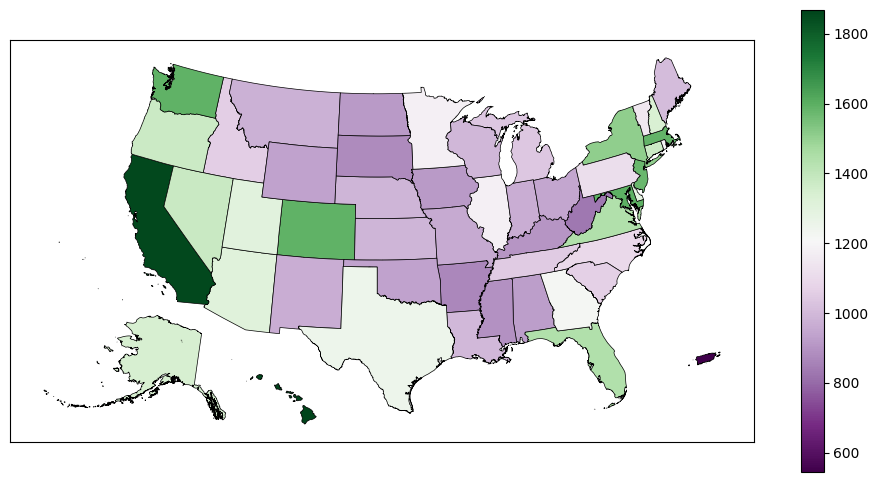

In [8]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states_median_rent,
    VARIABLE_MEDIAN_RENT,
    
    # The **kwargs here are standard Matplotlib **kwargs
    cmap="PRGn",
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    figsize=(12, 6)
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Additional Geographies

## On-Spine Geography

- Levels of geography that are nested within one another.
- Lower levels are fully contained in higher levels.
- Lower levels completely cover higher levels.
- Levels are:
  - Nation (US)
  - Region
  - Division
  - State
  - County
  - Census Tract
  - Block Group
  - Block

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The United States

In [9]:
from censusdis.datasets import DECENNIAL_PUBLIC_LAW_94_171

VARIABLE_TOTAL_POPULATION = "P1_001N"

In [10]:
gdf_us = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # The entire nation.
    us="*",
    
    with_geometry=True  
)

In [11]:
gdf_us

,US,NAME,P1_001N,geometry
0,1,United States,331449281,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."


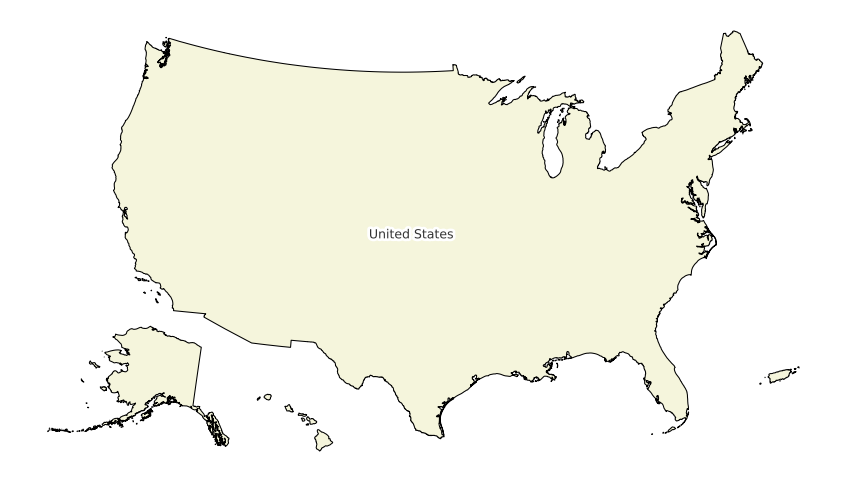

In [12]:
ax = cem.plot_us(
    gdf_us.clip((-180, 0, -65, 80)), # Clip off some outlying territories.
    linewidth=0.75, 
    geo_label=gdf_us["NAME"],
    color='beige', 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### All Regions

In [13]:
gdf_regions = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # All the regions (there are only four)
    region="*",
    
    with_geometry=True  
)

In [14]:
gdf_regions

,REGION,NAME,P1_001N,geometry
0,2,Midwest Region,68985454,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 ..."
1,3,South Region,126266107,"MULTIPOLYGON (((-75.56752 39.51020, -75.56477 ..."
2,4,West Region,78588572,"MULTIPOLYGON (((-135.49189 57.09997, -135.4885..."
3,1,Northeast Region,57609148,"MULTIPOLYGON (((-70.89841 42.34027, -70.89721 ..."


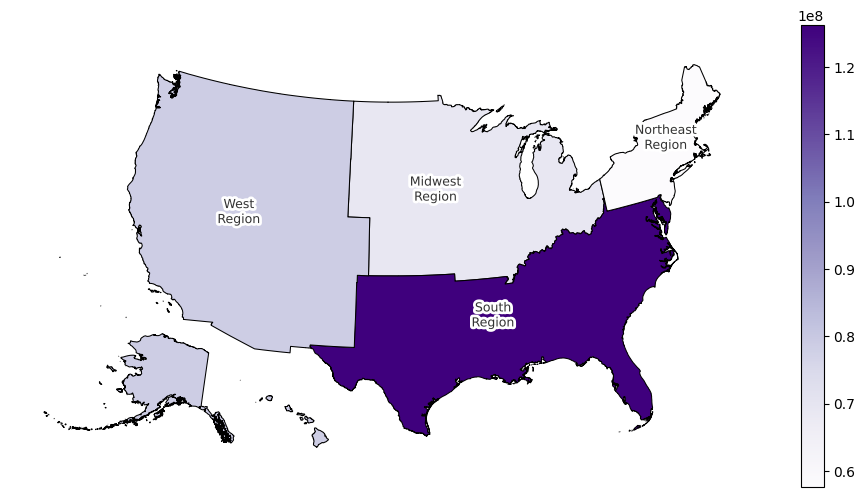

In [15]:
ax = cem.plot_us(
    gdf_regions,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    geo_label=gdf_regions["NAME"].str.replace(' ', '\n'),
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The regions cover the entire US

So the sum of the population of the regions is equal to the population
of the United States.

In [16]:
gdf_regions[VARIABLE_TOTAL_POPULATION].sum()

331449281

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### All Divisions

Divisions are the next level of the hierarchy inside of regions.

In [17]:
gdf_divisions = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # All the divisions
    division="*",
    
    with_geometry=True  
)

In [18]:
gdf_divisions

,DIVISION,NAME,P1_001N,geometry
0,1,New England Division,15116205,"MULTIPOLYGON (((-67.76649 44.53099, -67.76292 ..."
1,2,Middle Atlantic Division,42492943,"MULTIPOLYGON (((-72.03769 41.25128, -72.03472 ..."
2,3,East North Central Division,47368533,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 ..."
3,4,West North Central Division,21616921,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ..."
4,5,South Atlantic Division,66089734,"MULTIPOLYGON (((-75.56752 39.51020, -75.56477 ..."
5,6,East South Central Division,19402234,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
6,7,West South Central Division,40774139,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
7,8,Mountain Division,24919150,"POLYGON ((-120.00645 39.27288, -120.00643 39.2..."
8,9,Pacific Division,53669422,"MULTIPOLYGON (((-133.55208 56.43024, -133.5476..."


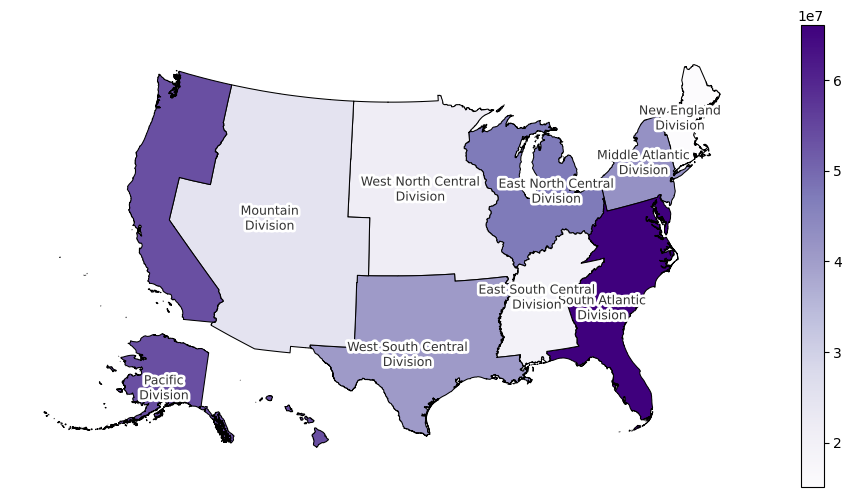

In [19]:
ax = cem.plot_us(
    gdf_divisions,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    geo_label=gdf_divisions["NAME"].str.replace(' Division', '\nDivision'),
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The divisions cover all the regions, which in turn cover the entire US

- the sum of the population of the regions is equal to the population
of the United States.

- we can add them up at any level and get the same answer.

- this is a fundademntal property of on-spine geographies.

In [20]:
gdf_regions[VARIABLE_TOTAL_POPULATION].sum()

331449281

In [21]:
gdf_divisions[VARIABLE_TOTAL_POPULATION].sum()

331449281

In [22]:
gdf_us[VARIABLE_TOTAL_POPULATION].sum()

331449281

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The divisions in a region add up to the population of the division

In [23]:
gdf_divisions[gdf_divisions['DIVISION'].isin(("1", "2"))][VARIABLE_TOTAL_POPULATION].sum()

57609148

In [24]:
gdf_regions[gdf_regions['REGION'] == "1"][VARIABLE_TOTAL_POPULATION].iloc[0]

57609148

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### States (and DC) nest inside divisions

This takes us back to the state geometries we had in the median rent query.

In [25]:
gdf_states = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],

    # All the states
    state="*",
    
    with_geometry=True  
)

In [26]:
gdf_states.head()

,STATE,NAME,P1_001N,geometry
0,42,Pennsylvania,13002700,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
1,06,California,39538223,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,54,West Virginia,1793716,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
3,49,Utah,3271616,"POLYGON ((-114.05296 37.59278, -114.05247 37.6..."
4,36,New York,20201249,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 ..."


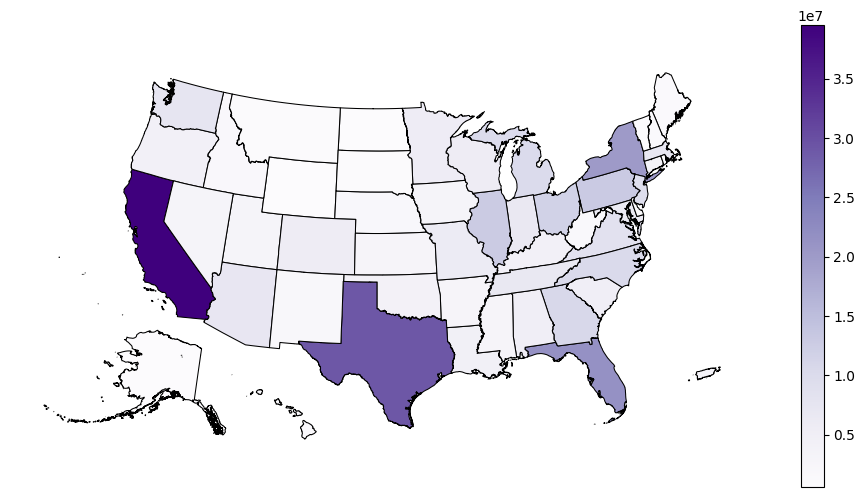

In [27]:
ax = cem.plot_us(
    gdf_states,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The states* cover all the divisionsm which cover all the regions, which in turn cover the entire US

- the sum of the population of the states* is equal to the population
of the United States.

In [28]:
gdf_states[VARIABLE_TOTAL_POPULATION].sum()

334735155

In [29]:
gdf_us[VARIABLE_TOTAL_POPULATION].sum()

331449281

### Oops! What went wrong?

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Puerto Rico is a "state" but is not in any division or region

- when we query for all states, we get PR
- but our earlier queries excluded it
- an exception to the containement rule for on-spine geographies
- to make it more confusing, PR geometry is on the US map

In [30]:
# PR is in our data for all the states:
gdf_states[gdf_states['STATE'] == states.PR]

,STATE,NAME,P1_001N,geometry
48,72,Puerto Rico,3285874,"MULTIPOLYGON (((-65.23773 18.32118, -65.23612 ..."


In [31]:
# There are 52 "states" including PR and DC
len(gdf_states.index)

52

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### What if we filter our PR?

In [32]:
gdf_states[gdf_states['STATE'] != states.PR][VARIABLE_TOTAL_POPULATION].sum()

331449281

In [33]:
gdf_states[gdf_states['STATE'] == states.PR][VARIABLE_TOTAL_POPULATION].iloc[0]

3285874

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Within a State

For the next series of examples, we will go back to the ACS5 dataset and we
will query and plot median household income at several different levels of
geography.

In [34]:
VARIABLE_MEDIAN_HOUSEHOLD_INCOME = 'B19013_001E'

gdf_md = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # Just Maryland
    state=states.MD,
    
    with_geometry=True  
)

In [35]:
gdf_md

,STATE,NAME,B19013_001E,geometry
0,24,Maryland,98461,"MULTIPOLYGON (((-76.04998 37.99011, -76.04865 ..."


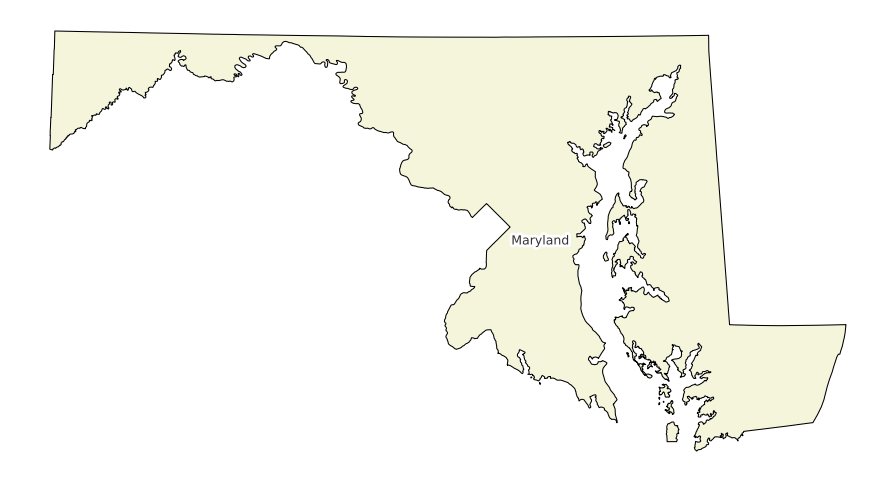

In [36]:
ax = cem.plot_map(
    gdf_md,
    linewidth=0.75, 
    geo_label=gdf_md["NAME"].str.replace(' ', '\n'),
    color='beige', 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

In [37]:
gdf_md_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All Counties in Maryland. Notice how we use
    # two different arguments.
    state=states.MD,
    county='*',
    
    with_geometry=True  
)

In [38]:
gdf_md_counties

,STATE,COUNTY,NAME,B19013_001E,geometry
0,24,001,"Allegany County, Maryland",55248,"POLYGON ((-79.06756 39.47944, -79.06003 39.492..."
1,24,003,"Anne Arundel County, Maryland",116009,"POLYGON ((-76.83849 39.10421, -76.83047 39.106..."
2,24,005,"Baltimore County, Maryland",88157,"MULTIPOLYGON (((-76.32570 39.31397, -76.32452 ..."
3,24,009,"Calvert County, Maryland",128078,"POLYGON ((-76.70121 38.71276, -76.69915 38.715..."
4,24,011,"Caroline County, Maryland",65326,"POLYGON ((-76.01505 38.72869, -76.01321 38.733..."
5,24,013,"Carroll County, Maryland",111672,"POLYGON ((-77.31116 39.63973, -77.30717 39.641..."
6,24,015,"Cecil County, Maryland",86869,"POLYGON ((-76.23326 39.72131, -76.15435 39.721..."
7,24,017,"Charles County, Maryland",116882,"POLYGON ((-77.27240 38.48994, -77.26986 38.492..."
8,24,019,"Dorchester County, Maryland",57490,"MULTIPOLYGON (((-76.06544 38.12980, -76.06461 ..."
9,24,021,"Frederick County, Maryland",115724,"POLYGON ((-77.67716 39.32453, -77.67637 39.330..."


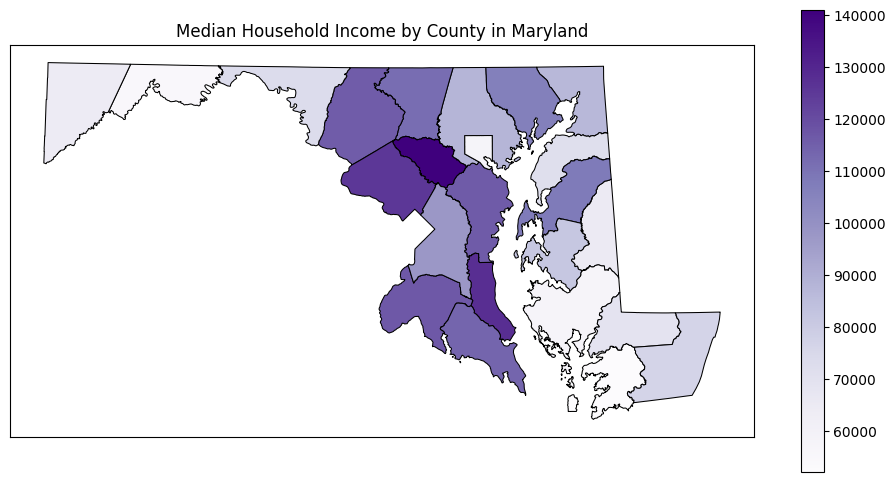

In [39]:
ax = cem.plot_map(
    gdf_md_counties,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by County in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts in Maryland

In [40]:
gdf_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All tracts in all counties in Maryland. 
    # We now use three arguments.
    state=states.MD,
    county='*',
    tract='*',
    
    with_geometry=True  
)

In [41]:
gdf_md_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,24,001,000100,Census Tract 1; Allegany County; Maryland,56232.0,"POLYGON ((-78.66654 39.64906, -78.66520 39.651..."
1,24,001,000200,Census Tract 2; Allegany County; Maryland,66596.0,"POLYGON ((-78.77810 39.60210, -78.77686 39.604..."
2,24,001,000500,Census Tract 5; Allegany County; Maryland,47781.0,"POLYGON ((-78.75836 39.65248, -78.75665 39.654..."
3,24,001,000600,Census Tract 6; Allegany County; Maryland,48607.0,"POLYGON ((-78.76192 39.64337, -78.75821 39.648..."
4,24,001,000700,Census Tract 7; Allegany County; Maryland,36090.0,"POLYGON ((-78.76509 39.63262, -78.76310 39.635..."


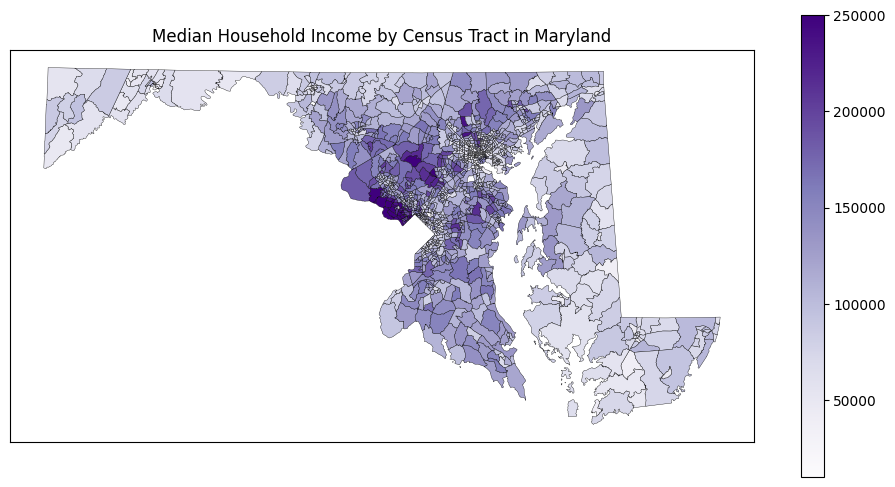

In [42]:
ax = cem.plot_map(
    gdf_md_tracts,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.25, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by Census Tract in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts in Prince George's County, Maryland

In [43]:
import censusdis.counties.maryland as md_counties

gdf_prince_georges_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All tracts in all counties in Maryland. 
    # We now use three arguments.
    state=states.MD,
    county=md_counties.PRINCE_GEORGES,
    tract='*',
    
    with_geometry=True  
)

In [44]:
gdf_prince_georges_md_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,24,033,800102,Census Tract 8001.02; Prince George's County; ...,71477,"POLYGON ((-76.86658 39.10759, -76.86454 39.108..."
1,24,033,800103,Census Tract 8001.03; Prince George's County; ...,78536,"POLYGON ((-76.85305 39.10030, -76.84898 39.104..."
2,24,033,800105,Census Tract 8001.05; Prince George's County; ...,93779,"POLYGON ((-76.88941 39.10159, -76.88935 39.101..."
3,24,033,800106,Census Tract 8001.06; Prince George's County; ...,112330,"POLYGON ((-76.89385 39.08965, -76.89221 39.092..."
4,24,033,800108,Census Tract 8001.08; Prince George's County; ...,80550,"POLYGON ((-76.86995 39.09673, -76.86740 39.096..."


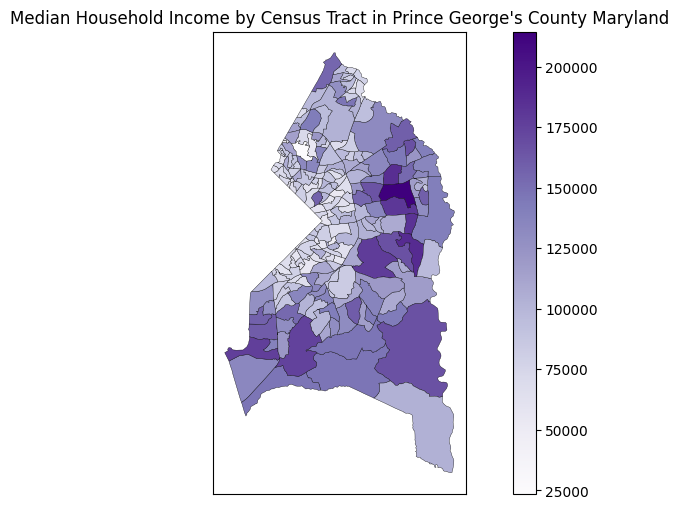

In [45]:
ax = cem.plot_map(
    gdf_prince_georges_md_tracts,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.25, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by Census Tract in Prince George's County Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *US - Region - Division - State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<img src="./images/census_geos.png" alt="Census Geographies">

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [46]:
list(ced.geographies(ACS5, 2022))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Different data sets support different geometries in different years

In [47]:
len(ced.geographies(ACS5, 2020))

87

In [48]:
len(ced.geographies(DECENNIAL_PUBLIC_LAW_94_171, 2020))

96

In [49]:
len(ced.geographies(DECENNIAL_PUBLIC_LAW_94_171, 2010))

83

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Places in Maryland

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [50]:
gdf_md_places = ced.download(
    ACS5,
    2022,
    ['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME], 
   
    # Query all places in Maryland
    state=states.MD,
    place='*',
    
    with_geometry=True
)

gdf_md_places.head(10)

,STATE,PLACE,NAME,B19013_001E,geometry
0,24,00125,"Aberdeen city, Maryland",74555.0,"POLYGON ((-76.20372 39.53569, -76.20026 39.538..."
1,24,00175,"Aberdeen Proving Ground CDP, Maryland",118750.0,"POLYGON ((-76.17136 39.49442, -76.17098 39.494..."
2,24,00200,"Abingdon CDP, Maryland",141384.0,"POLYGON ((-76.29964 39.46149, -76.28673 39.466..."
3,24,00225,"Accident town, Maryland",54333.0,"POLYGON ((-79.32468 39.62597, -79.32603 39.628..."
4,24,00250,"Accokeek CDP, Maryland",150917.0,"POLYGON ((-77.07860 38.69411, -77.05950 38.701..."
5,24,00350,"Adamstown CDP, Maryland",223250.0,"POLYGON ((-77.48359 39.30536, -77.47604 39.311..."
6,24,00400,"Adelphi CDP, Maryland",68396.0,"POLYGON ((-76.98363 39.00227, -76.98225 39.004..."
7,24,00712,"Algonquin CDP, Maryland",64185.0,"POLYGON ((-76.11321 38.58334, -76.11113 38.584..."
8,24,00800,"Allen CDP, Maryland",127891.0,"POLYGON ((-75.69521 38.29277, -75.69337 38.293..."
9,24,01450,"Andrews AFB CDP, Maryland",83966.0,"POLYGON ((-76.90366 38.80187, -76.90158 38.804..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

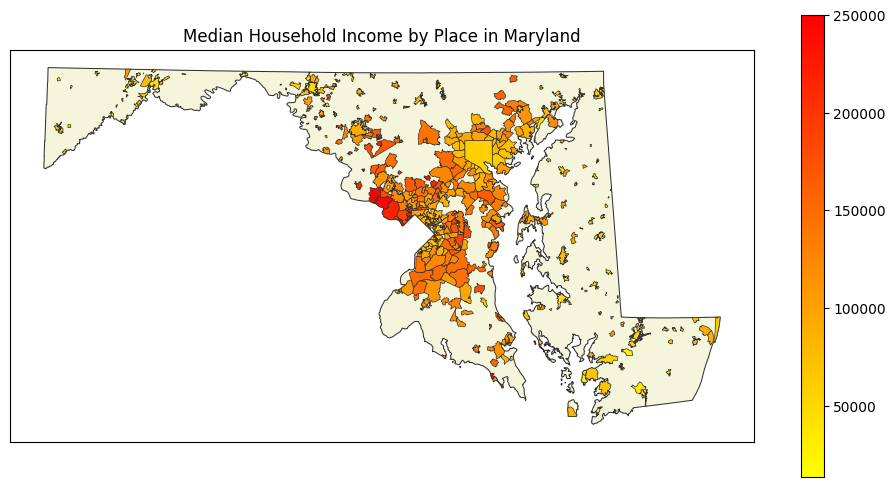

In [51]:
# Plot the whole state in a background color.
gdf_md_state = gdf_states[gdf_states['STATE']==states.MD]

ax = cem.plot_map(
    gdf_md_state, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_md_places,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
            
    figsize=(12, 6),
    legend=True,

    # Plot on top of the Maryland map we just plotted.
    ax=ax
)

_ = ax.set_title("Median Household Income by Place in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

#### Or if you prefer a background map

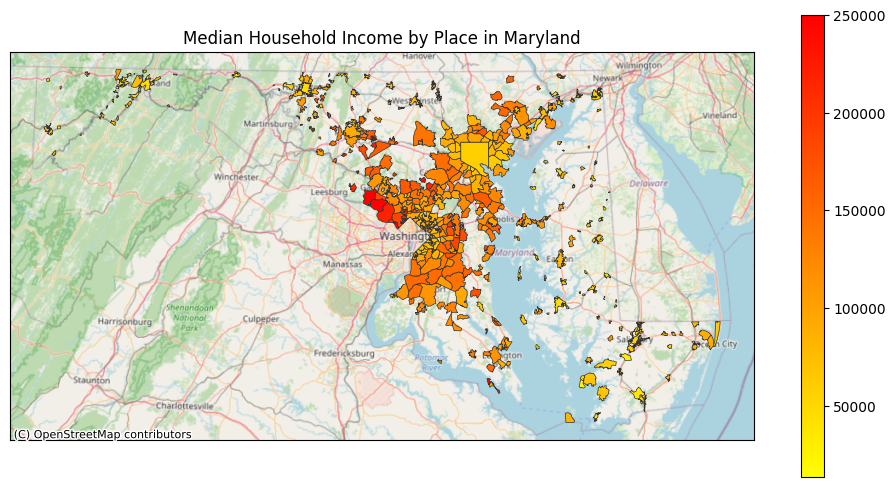

In [52]:
ax = cem.plot_map(
    gdf_md_places,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    
    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    figsize=(12, 6),
    legend=True,
    
    # Add a background map from Open Street Maps
    with_background=True
)

_ = ax.set_title("Median Household Income by Place in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query Core Based Statistical Areas (CBSAs) in the United States

- Metropolitan (population 50,000+) and Micropolitan (population 10,000-50,000) areas are collectively know as [Core Based Statistical Areas](https://en.wikipedia.org/wiki/Core-based_statistical_area) (CBSAs)
- Our list of geographies included `['metropolitan_statistical_area_micropolitan_statistical_area']`
- Note that this was standalone, not nested in a state like `place` was.
- CBSAs represent greater micro/metropolitan areas
- They may cross state lines

In [53]:
VARIABLE_TOTAL_POPULATION_ACS = 'B03002_001E'

gdf_cbsa = ced.download(
    dataset=ACS5,
    vintage=2020,

    # Let's get name, income, and population.
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME, VARIABLE_TOTAL_POPULATION_ACS], 
   
    # Query all CBSAs in the country.
    metropolitan_statistical_area_micropolitan_statistical_area='*',
    
    with_geometry=True
)

In [54]:
gdf_cbsa.head()

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,NAME,B19013_001E,B03002_001E,geometry
0,10100,"Aberdeen, SD Micro Area",62042,42864,"POLYGON ((-99.70847 45.31824, -99.70837 45.332..."
1,10140,"Aberdeen, WA Micro Area",50665,73769,"MULTIPOLYGON (((-123.88453 46.96579, -123.8771..."
2,10180,"Abilene, TX Metro Area",54857,171354,"POLYGON ((-100.15184 32.09064, -100.15170 32.1..."
3,10220,"Ada, OK Micro Area",51682,38385,"POLYGON ((-96.93249 34.69496, -96.93249 34.767..."
4,10300,"Adrian, MI Micro Area",57314,98310,"POLYGON ((-84.36330 42.07346, -84.33584 42.073..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Largest CBSAs

In [55]:
# We want the n largest CBSAs by population.
n = 100
gdf_large_cbsa = gdf_cbsa.nlargest(n, VARIABLE_TOTAL_POPULATION_ACS)

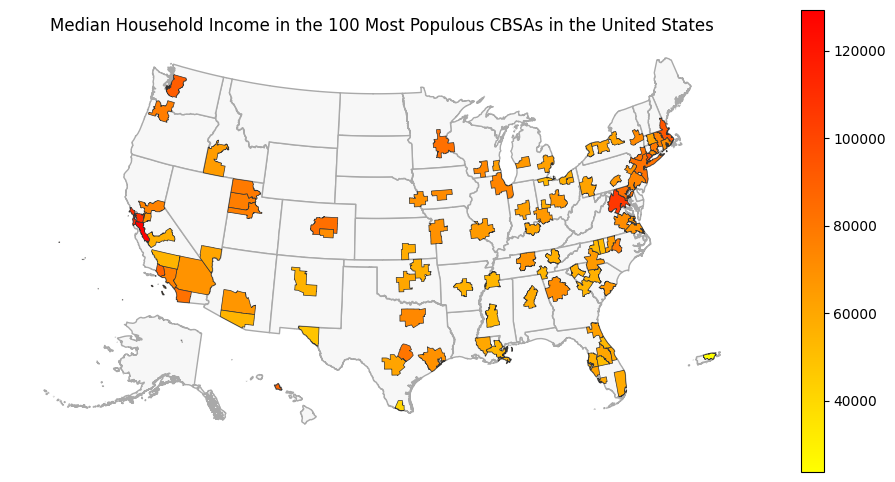

In [56]:
ax = cem.plot_us(
    gdf_states,
    color='#f7f7f7',
    edgecolor='darkgrey',
    figsize=(12,6)
)

ax = cem.plot_us(
    gdf_large_cbsa,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    
    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
        
    legend=True,
    
    ax=ax
)

ax.axis('off')
_ = ax.set_title(f'Median Household Income in the {n} Most Populous CBSAs in the United States')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Putting On and Off-Spine Geometries Together

- Sometimes we want to mix on and off-spine geometries. 
- This makes some sense to a human, even if the data model does not specifically enable it.
- For example: All census tracts in a place.

<img src="./images/census_geos_place_tract.png" alt="Path to Census Geographies Place and Tract">

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### `ced.contained_within` can get it right in most cases.

- We specify geometry in two steps:
  - Outer geoentry (the container)
  - Inner geometry (what is contained)

In [57]:
from censusdis.places.massachusetts import BOSTON_CITY

gdf_boston_tracts = ced.contained_within(
    # This is the outer geometry that we want all of our results to be within.
    state=states.MA,
    place=BOSTON_CITY
).download(
    # This looks like the arguments to an ordinary `ced.download`
    # but the results will be restricted to those contained within
    # Boston.
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME", VARIABLE_MEDIAN_RENT],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state=states.MA,
    county="*",
    tract="*",

    with_geometry=True,

    # This makes the maps a little prettier by clipping 
    # water from the geographies.
    remove_water=True,
)

In [58]:
gdf_boston_tracts.head(10)

,STATE,PLACE,COUNTY,TRACT,NAME,B25064_001E,geometry
0,25,07000,025,000101,Census Tract 1.01; Suffolk County; Massachusetts,2438.0,"POLYGON ((-71.13660 42.36016, -71.13627 42.360..."
1,25,07000,025,000102,Census Tract 1.02; Suffolk County; Massachusetts,2121.0,"POLYGON ((-71.16090 42.35863, -71.15399 42.359..."
2,25,07000,025,000201,Census Tract 2.01; Suffolk County; Massachusetts,2652.0,"POLYGON ((-71.16764 42.35379, -71.16520 42.353..."
3,25,07000,025,000202,Census Tract 2.02; Suffolk County; Massachusetts,2144.0,"POLYGON ((-71.16056 42.35267, -71.15859 42.353..."
4,25,07000,025,000301,Census Tract 3.01; Suffolk County; Massachusetts,2634.0,"POLYGON ((-71.17394 42.35340, -71.17139 42.356..."
5,25,07000,025,000302,Census Tract 3.02; Suffolk County; Massachusetts,2675.0,"POLYGON ((-71.16993 42.34938, -71.16811 42.350..."
6,25,07000,025,000401,Census Tract 4.01; Suffolk County; Massachusetts,1930.0,"POLYGON ((-71.15473 42.34121, -71.15346 42.343..."
7,25,07000,025,000402,Census Tract 4.02; Suffolk County; Massachusetts,2234.0,"POLYGON ((-71.16600 42.34159, -71.16212 42.346..."
8,25,07000,025,000502,Census Tract 5.02; Suffolk County; Massachusetts,2127.0,"POLYGON ((-71.16674 42.33985, -71.16670 42.340..."
9,25,07000,025,000503,Census Tract 5.03; Suffolk County; Massachusetts,1935.0,"POLYGON ((-71.15274 42.33865, -71.15259 42.338..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the tracts in Boston

In [59]:
# Let's get the outline of Boston just so we can illustrate
# it when we plot the map.
gdf_boston = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],

    state=states.MA,
    place=BOSTON_CITY,
    
    with_geometry=True,
)

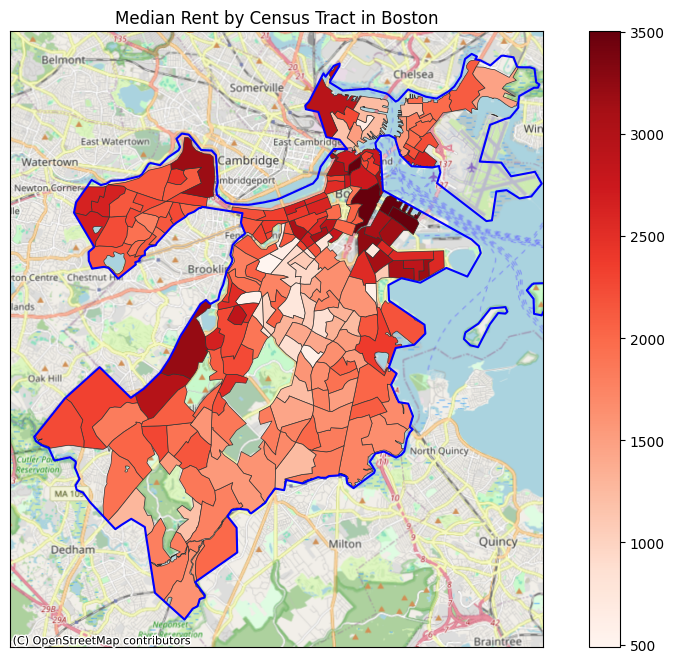

In [60]:
# Plot the median household income for all tracts for which
# we have data.
ax = cem.plot_map(
    gdf_boston_tracts,

    VARIABLE_MEDIAN_RENT,

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.5,
    
    legend=True,

    with_background=True,
    
    figsize=(12, 8),
)

# Plot the boundary of Boston over the top.
ax = cem.plot_map(
    gdf_boston.boundary,
    color='blue',
    linewidth=1.5,
    ax=ax,
    zorder=20,
)

_ = ax.set_title("Median Rent by Census Tract in Boston")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# The U.S. Census Data Model in Detail

# Filling in some holes from our queries above:

Those queries were fun, but 
- how did we know the ACS 5 and decennial data sets exist?
- how did we know that median household income was represented by the variable, `'B19013_001E'` etc...? 
- how do we explore groups and individual variables to find variables that might interest us?

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Discovering all the Datasets

In [61]:
df_datasets = ced.variables.all_data_sets()
df_datasets

,YEAR,DATASET,TITLE,DESCRIPTION,API BASE URL
0,1986,cbp,1986 County Business Patterns: Business Patterns,County Business Patterns (CBP) is an annual se...,http://api.census.gov/data/1986/cbp
1,1987,cbp,1987 County Business Patterns: Business Patterns,County Business Patterns (CBP) is an annual se...,http://api.census.gov/data/1987/cbp
2,1988,cbp,1988 County Business Patterns: Business Patterns,County Business Patterns (CBP) is an annual se...,http://api.census.gov/data/1988/cbp
3,1989,cbp,1989 County Business Patterns: Business Patterns,County Business Patterns (CBP) is an annual se...,http://api.census.gov/data/1989/cbp
4,1989,cps/basic/apr,Apr 1989 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployme...",http://api.census.gov/data/1989/cps/basic/apr
...,...,...,...,...,...
1597,timeseries,timeseries/pseo/flows,Post-Secondary Employment Outcomes (PSEO): Pos...,Post-Secondary Employment Outcomes (PSEO) are ...,http://api.census.gov/data/timeseries/pseo/flows
1598,timeseries,timeseries/qwi/rh,Time Series Longitudinal Employer-Household Dy...,The Quarterly Workforce Indicators (QWI) are a...,http://api.census.gov/data/timeseries/qwi/rh
1599,timeseries,timeseries/qwi/sa,Time Series Longitudinal Employer-Household Dy...,The Quarterly Workforce Indicators (QWI) are a...,http://api.census.gov/data/timeseries/qwi/sa
1600,timeseries,timeseries/qwi/se,Time Series Longitudinal Employer-Household Dy...,The Quarterly Workforce Indicators (QWI) are a...,http://api.census.gov/data/timeseries/qwi/se


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Find ACS 5

In [62]:
df_datasets[df_datasets['TITLE'].str.contains('American Community Survey: 5-Year')].head()

,YEAR,DATASET,TITLE,DESCRIPTION,API BASE URL
636,2009,acs/acs5,American Community Survey: 5-Year Estimates: D...,The American Community Survey (ACS) is an ongo...,http://api.census.gov/data/2009/acs/acs5
637,2009,acs/acs5/profile,American Community Survey: 5-Year Estimates: D...,The American Community Survey (ACS) is an ongo...,http://api.census.gov/data/2009/acs/acs5/profile
638,2009,acs/acs5/pums,2005-2009 American Community Survey: 5-Year Es...,The American Community Survey (ACS) Public Use...,http://api.census.gov/data/2009/acs/acs5/pums
639,2009,acs/acs5/pumspr,2005-2009 American Community Survey: 5-Year Es...,The Public Use Microdata Sample (PUMS) for Pue...,http://api.census.gov/data/2009/acs/acs5/pumspr
675,2010,acs/acs5/aian,American Community Survey: 5-Year Estimates: A...,The American Indian and Alaska Native (AIAN) t...,http://api.census.gov/data/2010/acs/acs5/aian


`dataset="acs/acs5"` is perfectly acceptable syntax. This is what the U.S. Census API calls it.
The symbols in `ced.datasets`, like `ACS5`, are just sybols for them, which are optional.

In [63]:
df_md_median_rent = ced.download(
    
    # Use the string instead of the symbol ACS5
    dataset="acs/acs5",
    
    vintage=2022, 
    download_variables=VARIABLE_MEDIAN_RENT, 
    state=states.MD
)

df_md_median_rent

,STATE,B25064_001E
0,24,1598


Note that the value of the symbol is the string.

In [64]:
ACS5

'acs/acs5'

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## All the Groups of Variables in a Data Set for a Given Vintage

In [65]:
df_groups = ced.variables.all_groups('acs/acs5', 2022)

df_groups

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs5,2022,B01001,Sex by Age
1,acs/acs5,2022,B01001A,Sex by Age (White Alone)
2,acs/acs5,2022,B01001B,Sex by Age (Black or African American Alone)
3,acs/acs5,2022,B01001C,Sex by Age (American Indian and Alaska Native ...
4,acs/acs5,2022,B01001D,Sex by Age (Asian Alone)
...,...,...,...,...
1177,acs/acs5,2022,C27014,Public Health Insurance by Work Experience
1178,acs/acs5,2022,C27016,Health Insurance Coverage Status by Ratio of I...
1179,acs/acs5,2022,C27017,Private Health Insurance by Ratio of Income to...
1180,acs/acs5,2022,C27018,Public Health Insurance by Ratio of Income to ...


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Remember dec/pl had more geometries?

- What about groups of variables? 
  - It has a lot less.

In [66]:
df_groups_dec_pl = ced.variables.all_groups('dec/pl', 2020)

df_groups_dec_pl

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/pl,2020,H1,OCCUPANCY STATUS
1,dec/pl,2020,P1,RACE
2,dec/pl,2020,P2,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO..."
3,dec/pl,2020,P3,RACE FOR THE POPULATION 18 YEARS AND OVER
4,dec/pl,2020,P4,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO..."
5,dec/pl,2020,P5,GROUP QUARTERS POPULATION BY MAJOR GROUP QUART...


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Finding Interesting Groups

In [67]:
df_groups[df_groups['DESCRIPTION'].str.contains('MEDIAN HOUSEHOLD INCOME')]

,DATASET,YEAR,GROUP,DESCRIPTION


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Variables in a Group

This particular group has only one variable.

In [68]:
ced.variables.all_variables('acs/acs5', 2020, 'B19013')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B19013,B19013_001E,Estimate!!Median household income in the past ...,NaN,None


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## A Group with Several Variables

In [69]:
ced.variables.all_variables('acs/acs5', 2020, 'B25119')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B25119,B25119_001E,Estimate!!Median household income in the past ...,NaN,None
1,2020,acs/acs5,B25119,B25119_002E,Estimate!!Median household income in the past ...,NaN,None
2,2020,acs/acs5,B25119,B25119_003E,Estimate!!Median household income in the past ...,NaN,None


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Variables in a Group as a Tree

In many groups, 

- variables and their values are aggregated in a tree
- the tree is implicitly encoded as root-to-note paths in each variable's label
  - Uses `!!` and `:`  
- `ced.variables.group_tree` can query the structure of the tree
  - Labels are parsed for us

In [70]:
ced.variables.group_tree('acs/acs5', 2020, "B25119")

+ Estimate
    + Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --
        + Total: (B25119_001E)
            + Owner occupied (dollars) (B25119_002E)
            + Renter occupied (dollars) (B25119_003E)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Deeper Trees

Here is an example of a group that has a tree of variables that is 
three to four levels deep, not just two.

In [71]:
ced.variables.group_tree('dec/pl', 2020, 'P2')

+  
    + Total: (P2_001N)
        + Hispanic or Latino (P2_002N)
        + Not Hispanic or Latino: (P2_003N)
            + Population of one race: (P2_004N)
                + White alone (P2_005N)
                + Black or African American alone (P2_006N)
                + American Indian and Alaska Native alone (P2_007N)
                + Asian alone (P2_008N)
                + Native Hawaiian and Other Pacific Islander alone (P2_009N)
                + Some Other Race alone (P2_010N)
            + Population of two or more races: (P2_011N)
                + Population of two races: (P2_012N)
                    + White; Black or African American (P2_013N)
                    + White; American Indian and Alaska Native (P2_014N)
                    + White; Asian (P2_015N)
                    + White; Native Hawaiian and Other Pacific Islander (P2_016N)
                    + White; Some Other Race (P2_017N)
                    + Black or African American; American Indian and Alaska N

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Get a List of Leaves

In [72]:
ced.variables.group_leaves('acs/acs5', 2020, "B25119")

['B25119_002E', 'B25119_003E']

In [73]:
ced.variables.group_leaves('dec/pl', 2020, 'P2')

['P2_002N',
 'P2_005N',
 'P2_006N',
 'P2_007N',
 'P2_008N',
 'P2_009N',
 'P2_010N',
 'P2_013N',
 'P2_014N',
 'P2_015N',
 'P2_016N',
 'P2_017N',
 'P2_018N',
 'P2_019N',
 'P2_020N',
 'P2_021N',
 'P2_022N',
 'P2_023N',
 'P2_024N',
 'P2_025N',
 'P2_026N',
 'P2_027N',
 'P2_029N',
 'P2_030N',
 'P2_031N',
 'P2_032N',
 'P2_033N',
 'P2_034N',
 'P2_035N',
 'P2_036N',
 'P2_037N',
 'P2_038N',
 'P2_039N',
 'P2_040N',
 'P2_041N',
 'P2_042N',
 'P2_043N',
 'P2_044N',
 'P2_045N',
 'P2_046N',
 'P2_047N',
 'P2_048N',
 'P2_050N',
 'P2_051N',
 'P2_052N',
 'P2_053N',
 'P2_054N',
 'P2_055N',
 'P2_056N',
 'P2_057N',
 'P2_058N',
 'P2_059N',
 'P2_060N',
 'P2_061N',
 'P2_062N',
 'P2_063N',
 'P2_064N',
 'P2_066N',
 'P2_067N',
 'P2_068N',
 'P2_069N',
 'P2_070N',
 'P2_071N',
 'P2_073N']

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query All Variables in a Group

In [74]:
df_west_coast_income_by_tenure = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure

,STATE,NAME,B25119_001E,B25119_002E,B25119_003E
0,06,California,78672,102875,55241
1,41,Oregon,65667,82264,43802
2,53,Washington,77006,95075,52022


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Just the Leaves of a Group

In [75]:
df_west_coast_income_by_tenure_leaves = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    leaves_of_group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure_leaves

,STATE,NAME,B25119_002E,B25119_003E
0,06,California,102875,55241
1,41,Oregon,82264,43802
2,53,Washington,95075,52022


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Leaves of a larger tree of variables

This is an example of the kind of case where `leaves_of_group=` 
is really useful. It allows us to get a count of every racial
and ethnic group without any of the intermediate aggregations.

In [76]:
df_west_coast_demographics = ced.download(
    dataset='dec/pl',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are leaves of this group
    leaves_of_group="P2",
    
    state=[states.WA, states.OR, states.CA]
)

In [77]:
df_west_coast_demographics

,STATE,NAME,P2_002N,P2_005N,P2_006N,P2_007N,P2_008N,P2_009N,P2_010N,P2_013N,...,P2_062N,P2_063N,P2_064N,P2_066N,P2_067N,P2_068N,P2_069N,P2_070N,P2_071N,P2_073N
0,06,California,15579652,13714587,2119286,156085,5978795,138167,223929,220162,...,35,62,15,683,406,65,71,21,1,130
1,41,Oregon,588757,3036158,78658,42042,191797,18197,22962,29744,...,1,0,0,105,38,3,12,11,0,29
2,53,Washington,1059213,4918820,296170,91191,723062,62490,43221,75362,...,5,12,2,218,64,26,24,12,12,29


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Summary

- ### How to query data
- ### How to query geometry with data
- ### How to plot maps
- ### How on and off-spine geoegraphies differ
- ### How to discover data sets
- ### How to discover groups and variables

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Q & A

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>